# ES 114 Probability Lab Assignment 4
###&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**By Karan Sagar Gandhi (23110157)**

In this Notebook, I plot various Probability density functions (PDFs) and the Cumulative distribution functions (CDFs) of the following continuous random variables:
1. Uniform Distribution
2. Gaussian/Normal Distribution
3. Exponential Distribution
4. Cauchy Distribution
5. Laplacian Distribution
6. Rayleigh Distribution

Along with these, I also have plotted the Cumulative distribution functions (CDFs) of the following discrete random variables (which were given in lab assignment 3):
1. Discrete Uniform Random Variables
2. Bernoulli Random Variables
3. Binomial Random Variables
4. Poisson Random Variables
5. Geometric Random Variables

## Importing the necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Functions
The following code segment consists of the functions that I'll use to plot PDFs and CDFs of various random variables.

In [ ]:
def plot_graph(X, Y, title, xlabel, ylabel, xlims=None, ylims=None, c='g', label="", legend=False):
  plt.plot(X, Y, label=label)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)

  if xlims:
    plt.xlim(*xlims)
  if ylims:
    plt.ylim(*ylims)
  plt.fill_between(X, Y, alpha=0.3, color=c)
  if legend:
    plt.legend()
  plt.grid()
  plt.show()

def factorial(n):
  res = 1
  for i in range(1, n + 1):
    res *= i
  return res

## Continious Random Variable PDFs and CDFs

**Note: Here I have plotted both the PDF and the CDF together that is the Part 1 and Part 2 of the assignment.**

Here I plot various Probability density functions (PDFs) and the Cumulative distribution functions (CDFs) of the following continuous random variables:
1. Uniform Distribution
2. Gaussian/Normal Distribution
3. Exponential Distribution
4. Cauchy Distribution
5. Laplacian Distribution
6. Rayleigh Distribution

### Uniform Distribution PDF and CDF

Uniform Distribution is used where the probability density of the given random variable is equally distributed in a given interval (between $a$ and $b$ in this case). The PDF $p_X(x)$ is given by:
$$ p_X(x) =   \left\{
\begin{array}{ll}
      \frac{1}{b - a} & ;\ x \in [a, b] \\
      0 & \text{; otherwise} \\
\end{array}
\right.  $$

We can easily derrive the cumulative distributive function for $p_X(x)$. The CDF $F_X(x)$ is given by the intergral of the PDF from negative infinity to x. This comes out to be the following function:

$$F_X(x) = \int_{-\infty}^x p_X(x) \ dx$$
$$\therefore \ F_X(x) =   \left\{
\begin{array}{ll}
      0 &;\ x < a\\
      \int_{a}^x \frac{1}{b - a} \ dx & ; \ x \in [a, b) \\
      1 & ; \ x \ge b \\
\end{array}
\right.  $$

$$\therefore \ F_X(x) =   \left\{
\begin{array}{ll}
      0 &;\ x < a\\
      \frac{x - a}{b - a} & ; \ x \in [a, b) \\
      1 & ; \ x \ge b \\
\end{array}
\right.  $$

In [ ]:
def Uniform_pdf(X, a, b):
  return np.where((X >= a) & (X <= b), 1/(b - a), 0)

def Uniform_cdf(a, b, x):
  return (x - a) / (b - a)

Enter Values for Graph 1
Please enter the lower bound for the uniform distribution (a) -1
Please enter the upper bound for the uniform distribution (b) 1
Enter Values for Graph 2
Please enter the lower bound for the uniform distribution (a) 5
Please enter the upper bound for the uniform distribution (b) 10


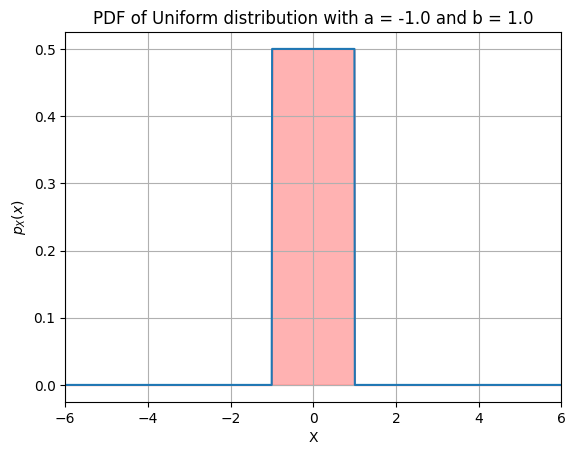

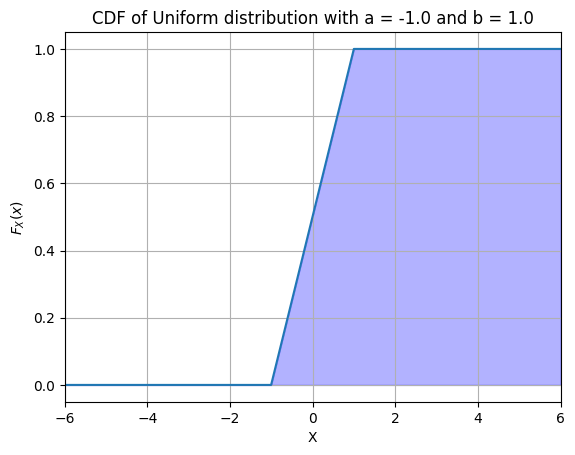

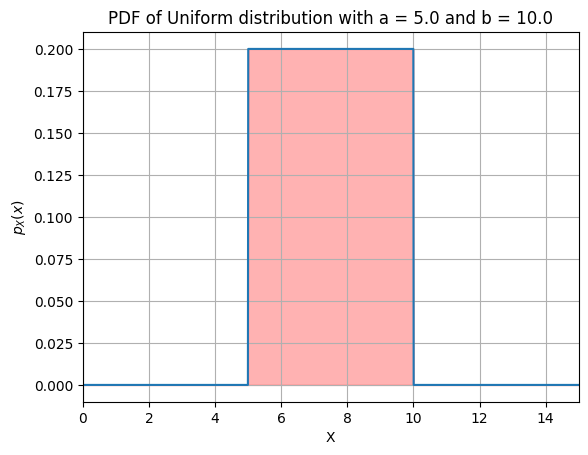

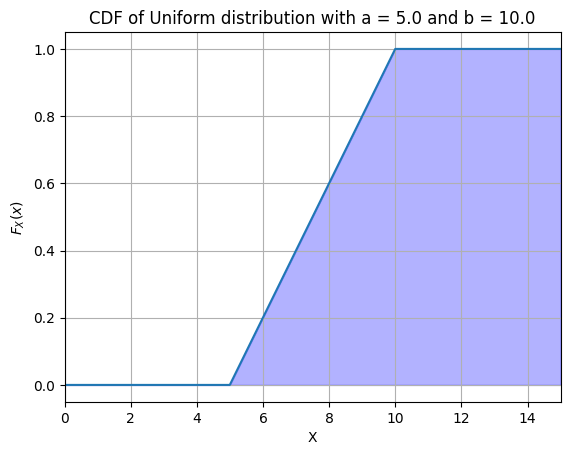

In [ ]:
def Plot_Uniform_PDF_CDF(a, b, lo, hi, N):
  X = np.linspace(lo, hi, int(N))
  Y = Uniform_pdf(X, a, b)
  cdf = np.cumsum(Y) / sum(Y)
  plot_graph(X, Y, f"PDF of Uniform distribution with a = {a} and b = {b}", "X", "$p_X(x)$", [lo, hi], c='r')
  plot_graph(X, cdf, f"CDF of Uniform distribution with a = {a} and b = {b}", "X", "$F_X(x)$", [lo, hi], c='b')

inputs = []
for i in range(2):
  print(f"Enter Values for Graph {i + 1}")
  a = float(input("Please enter the lower bound for the uniform distribution (a) "))
  b = float(input("Please enter the upper bound for the uniform distribution (b) "))
  lo = a - 5
  hi = b + 5
  N = (hi - lo) * 100
  inputs.append([a, b, lo, hi, N])

for i in range(2):
  Plot_Uniform_PDF_CDF(*inputs[i])

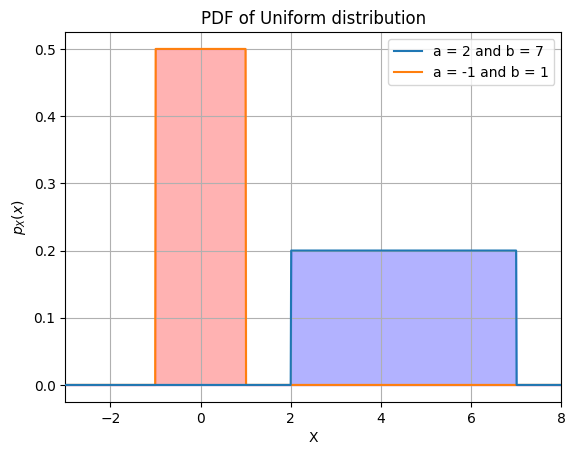

In [ ]:
hi = 8
lo = -3
N = 1000

X = np.linspace(lo, hi, int(N))
Y1 = Uniform_pdf(X, -1, 1)
Y2 = Uniform_pdf(X, 2, 7)

plt.plot(X, Y2, label="a = 2 and b = 7", zorder=5)
plt.fill_between(X, Y2, color='blue', alpha=0.3)
plot_graph(X, Y1, f"PDF of Uniform distribution", "X", "$p_X(x)$", [lo, hi], c='r', label=f'a = {-1} and b = {1}', legend=True)

### Gaussian/Normal Distribution PDF and CDF
The PDF $p_X(x)$ for a gaussian distribution is given by:
$$ p_X(x) = \frac{1}{\sqrt{2 \pi \sigma ^2}} e^{-\frac{1}{2} (\frac{x - \mu}{\sigma})^2}$$

We can easily derrive the cumulative distributive function for $p_X(x)$. The CDF $F_X(x)$ is given by the intergral of the PDF from negative infinity to x. This comes out to be the following function:

$$F_X(x) = \int_{-\infty}^x p_X(x) \ dx$$

$$\therefore \ F_X(x) = \int_{-\infty}^x \frac{1}{\sqrt{2 \pi \sigma ^2}} e^{-\frac{1}{2} (\frac{x - \mu}{\sigma})^2} \ dx$$
The close form for the above expression doesn't exist.

In [ ]:
def Normal_pdf(X, mu=0, sigma=1):
  return 1/math.sqrt(2 * math.pi * sigma * sigma) * np.exp(-1/2 * (X - mu) * (X - mu) / (sigma * sigma))

Enter values for Graph 1: 
Please enter the value for mu: 0
Please enter the value for sigma: 1
Enter values for Graph 2: 
Please enter the value for mu: 10
Please enter the value for sigma: 2


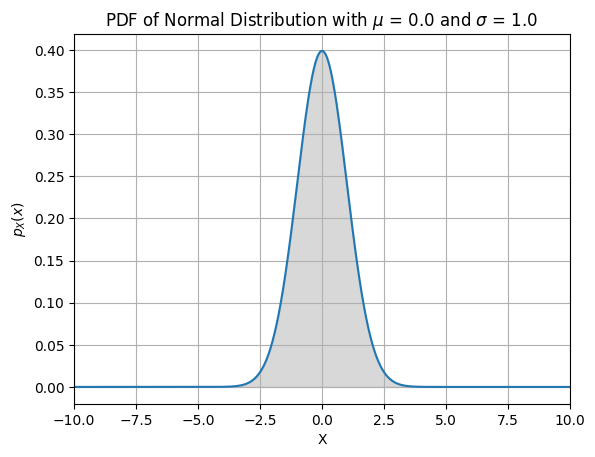

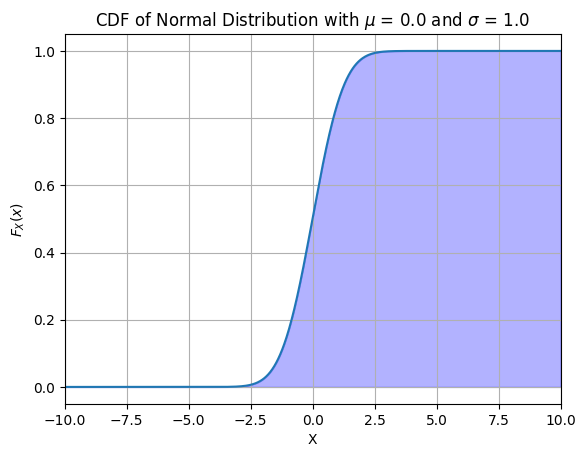

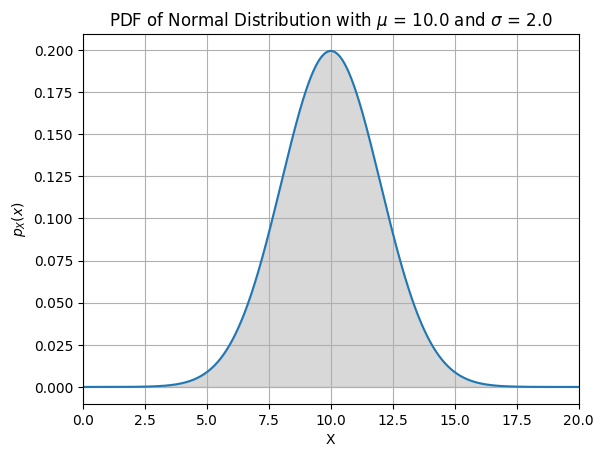

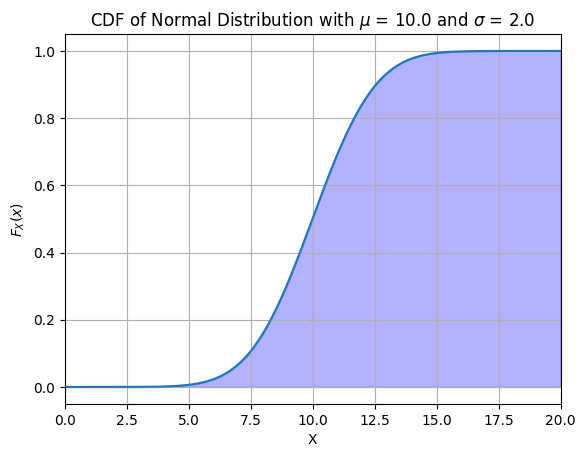

In [ ]:
inputs = []

def Plot_Normal_PDF_CDF(mu, sigma):
  hi = mu + 10
  lo = mu - 10
  N = 1000
  X = np.linspace(lo, hi, N)
  Y = Normal_pdf(X, mu, sigma)
  cdf = np.cumsum(Y / sum(Y))

  plot_graph(X, Y, f"PDF of Normal Distribution with $\mu$ = {mu} and $\sigma$ = {sigma}", "X", "$p_X(x)$", [lo, hi], c='grey')
  plot_graph(X, cdf, f"CDF of Normal Distribution with $\mu$ = {mu} and $\sigma$ = {sigma}", "X", "$F_X(x)$", [lo, hi], c='blue')

for i in range(2):
  print(f'Enter values for Graph {i + 1}: ')
  mu = float(input("Please enter the value for mu: "))
  sigma = float(input("Please enter the value for sigma: "))
  inputs.append([mu, sigma])

for i in inputs:
  Plot_Normal_PDF_CDF(*i)

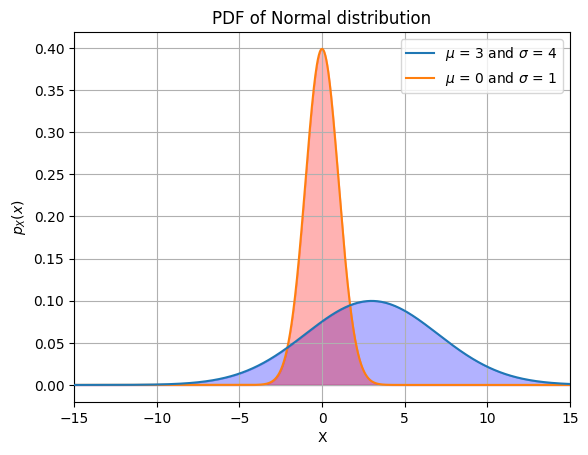

In [ ]:
hi = 15
lo = -15
N = 1000

X = np.linspace(lo, hi, int(N))
Y1 = Normal_pdf(X, 0, 1)
Y2 = Normal_pdf(X, 3, 4)

plt.plot(X, Y2, label="$\mu$ = 3 and $\sigma$ = 4", zorder=5)
plt.fill_between(X, Y2, color='blue', alpha=0.3)
plot_graph(X, Y1, f"PDF of Normal distribution", "X", "$p_X(x)$", [lo, hi], c='r', label=f'$\mu$ = {0} and $\sigma$ = 1', legend=True)

### Exponential Distribution PDF and CDF
The PDF $p_X(x)$ for a exponential distribution is given by:

$$ p_X(x) =   \left\{
\begin{array}{ll}
      \lambda e^{-\lambda x} & ;\ x \ge 0 \\
      0 & \text{; otherwise} \\
\end{array}
\right.  $$

We can easily derrive the cumulative distributive function for $p_X(x)$. The CDF $F_X(x)$ is given by the intergral of the PDF from negative infinity to x. This comes out to be the following function:

$$F_X(x) = \int_{-\infty}^x p_X(x) \ dx$$


$$\therefore \ F_X(x) =   \left\{
\begin{array}{ll}
      \int_{0}^x \lambda e^{-\lambda x} \ dx & ;\ x \ge 0 \\
      0 & \text{; otherwise} \\
\end{array}
\right.  $$

$$\therefore \ F_X(x) =   \left\{
\begin{array}{ll}
      1 - e ^ {-\lambda x} & ;\ x \ge 0 \\
      0 & \text{; otherwise} \\
\end{array}
\right.  $$


In [ ]:
def Exponential_pdf(X, l):
  return np.where(X < 0, 0, l * np.exp(-X * l))

def Exponential_cdf(X, l):
  return np.where(X < 0, 0, 1 - np.exp(-X * l))

Enter values for Graph 1
Please enter the value for lambda: 4
Enter values for Graph 2
Please enter the value for lambda: 12.5


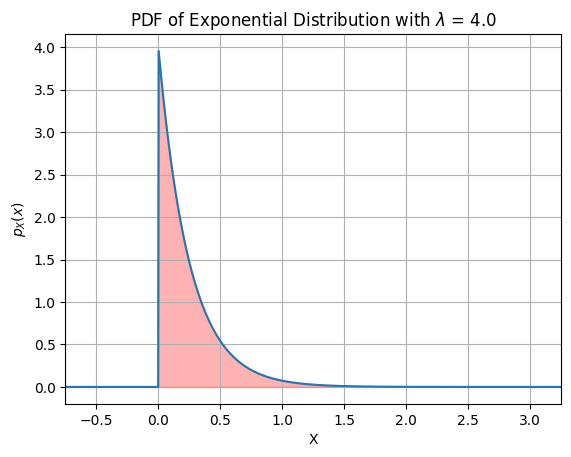

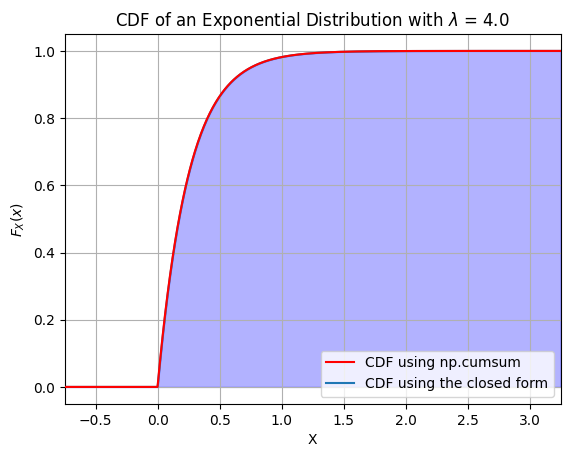

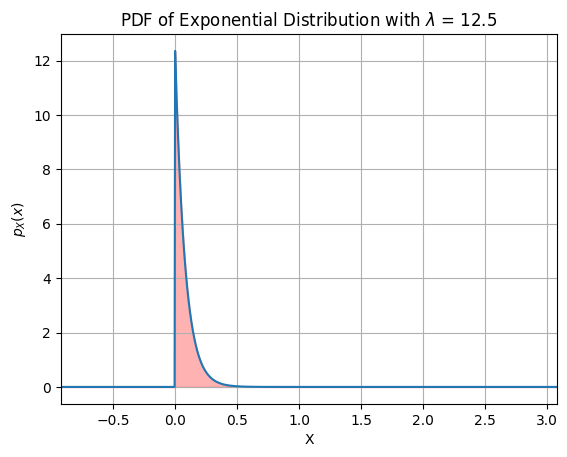

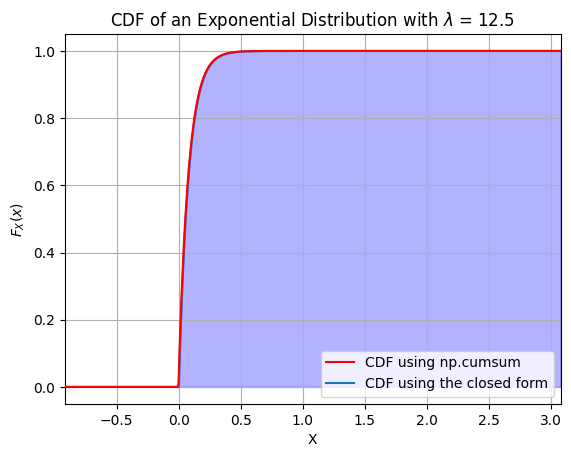

In [ ]:
inputs = []

def Plot_Exponential_PDF_CDF(l):
  hi = 1/l + 6 * 1/2
  lo = 1/l - 2 * 1/2
  N = 1000
  X = np.linspace(lo, hi, N)
  Y = Exponential_pdf(X, l)
  cdf = np.cumsum(Y / sum(Y))

  plot_graph(X, Y, f"PDF of Exponential Distribution with $\lambda$ = {l}", "X", "$p_X(x)$", [lo, hi], c='r')
  plt.plot(X, cdf, label="CDF using np.cumsum", zorder=5, color='red')
  plot_graph(X, Exponential_cdf(X, l), f"CDF of an Exponential Distribution with $\lambda$ = {l}", "X", "$F_X(x)$", [lo, hi], label="CDF using the closed form", legend=True, c='blue')

for i in range(2):
  print(f"Enter values for Graph {i + 1}")
  inputs.append([float(input("Please enter the value for lambda: "))])

for i in inputs:
  Plot_Exponential_PDF_CDF(*i)

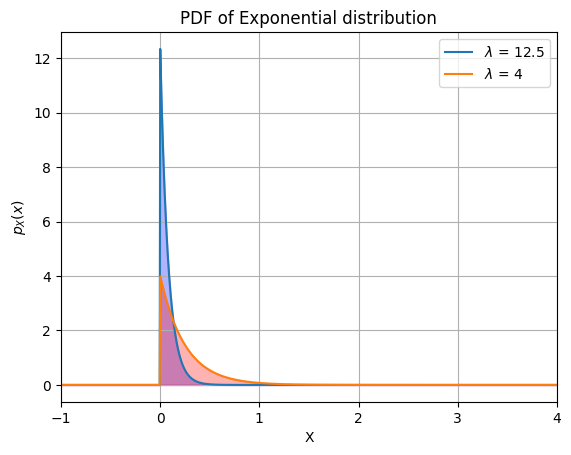

In [ ]:
hi = 4
lo = -1
N = 1000

X = np.linspace(lo, hi, int(N))
Y1 = Exponential_pdf(X, 4)
Y2 = Exponential_pdf(X, 12.5)

plt.plot(X, Y2, label="$\lambda$ = 12.5")
plt.fill_between(X, Y2, color='blue', alpha=0.3)
plot_graph(X, Y1, f"PDF of Exponential distribution", "X", "$p_X(x)$", [lo, hi], c='r', label=f'$\lambda$ = 4', legend=True)

### Cauchy Distribution PDF and CDF
The PDF $p_X(x)$ for a Cauchy distribution is given by:
$$ p_X(x) = \frac{1}{\pi r \big(1 + \big(\frac{x - x_0}{r} \big)^2 \big) }$$

We can easily derrive the cumulative distributive function for $p_X(x)$. The CDF $F_X(x)$ is given by the intergral of the PDF from negative infinity to x. This comes out to be the following function:

$$F_X(x) = \int_{-\infty}^x p_X(x) \ dx$$

$$\therefore \ F_X(x) = \int_{-\infty}^x \frac{1}{\pi r \big(1 + \big(\frac{x - x_0}{r} \big)^2 \big) } \ dx$$
This integral evaluates to:

$$F_X(x) = \frac{1}{\pi} \ \tan^{-1}(\frac{x - x_0}{r}) + \frac{1}{2}$$

In [ ]:
def Cauchy_pdf(X, x0, gamma):
  return 1/(math.pi * gamma * (1 + ((X - x0) / gamma) ** 2))

def Cauchy_cdf(X, x0, gamma):
  return 1/math.pi * np.arctan((X - x0) / gamma) + 1/2

Enter values for Graph 1
Please enter the value for x0: 0
Please enter the value for gamma: 1
Enter values for Graph 2
Please enter the value for x0: 20
Please enter the value for gamma: 10


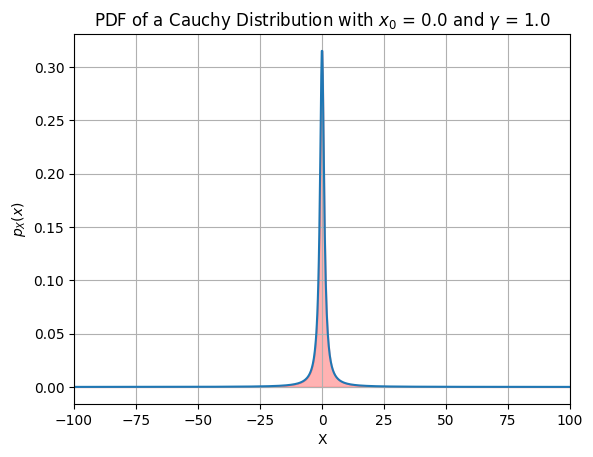

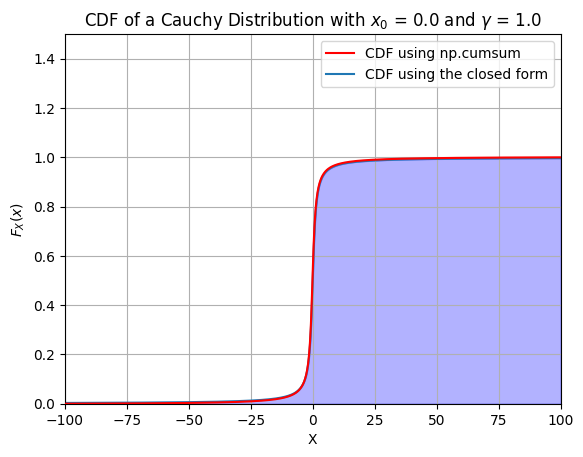

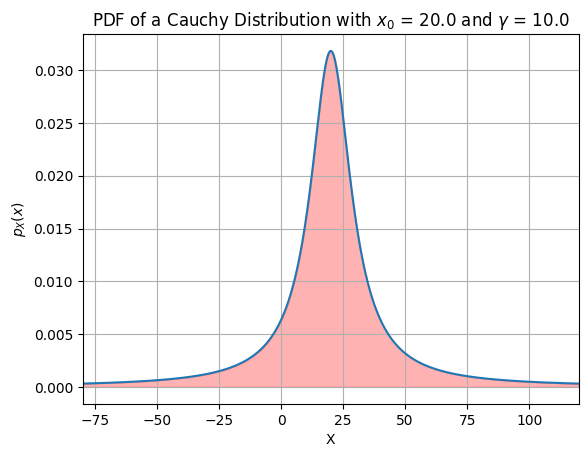

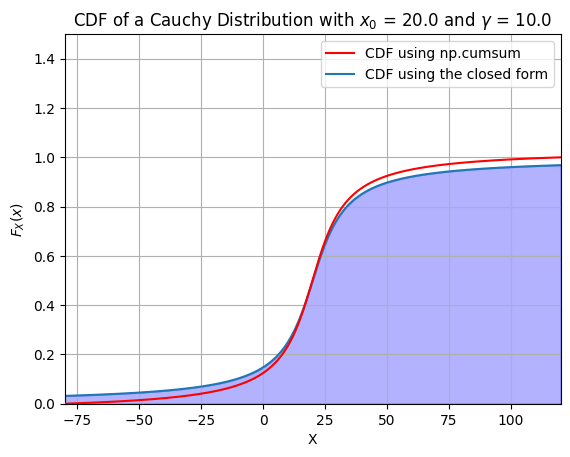

In [ ]:
inputs = []
# x0 = float(input("Please enter the value for x0: "))
# gamma = float(input("Please enter the value for gamma: "))

def Plot_Cauchy_PDF_CDF(x0, gamma):
  hi = x0 + 100
  lo = x0 - 100
  N = 1000
  X = np.linspace(lo, hi, N)
  Y = Cauchy_pdf(X, x0, gamma)
  cdf = np.cumsum(Y / sum(Y))

  plot_graph(X, Y, f"PDF of a Cauchy Distribution with $x_0$ = {x0} and $\gamma$ = {gamma}", "X", "$p_X(x)$", [lo, hi], c='r')
  plt.plot(X, cdf, label="CDF using np.cumsum", zorder=5, color='red')
  plot_graph(X, Cauchy_cdf(X, x0, gamma), f"CDF of a Cauchy Distribution with $x_0$ = {x0} and $\gamma$ = {gamma}", "X", "$F_X(x)$", [lo, hi], [0, 1.5], label="CDF using the closed form", legend=True, c='blue')

for i in range(2):
  print(f"Enter values for Graph {i + 1}")
  inputs.append([float(input("Please enter the value for x0: ")), float(input("Please enter the value for gamma: "))])

for i in inputs:
  Plot_Cauchy_PDF_CDF(*i)

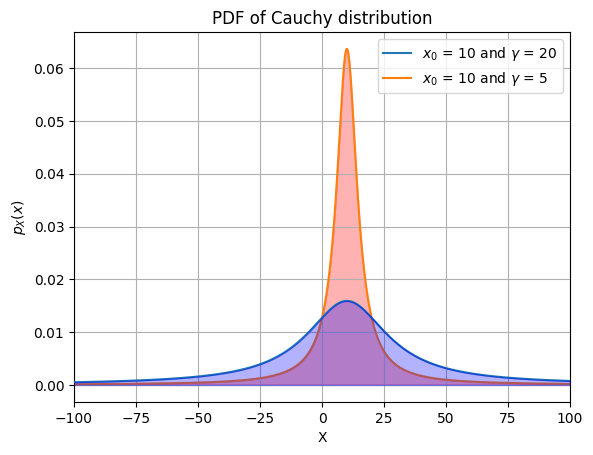

In [ ]:
hi = 100
lo = -100
N = 1000

X = np.linspace(lo, hi, int(N))
Y1 = Cauchy_pdf(X, 10, 5)
Y2 = Cauchy_pdf(X, 10, 20)

plt.plot(X, Y2, label="$x_0$ = 10 and $\gamma$ = 20", zorder=5)
plt.fill_between(X, Y2, color='blue', alpha=0.3, zorder=5)
plot_graph(X, Y1, f"PDF of Cauchy distribution", "X", "$p_X(x)$", [lo, hi], c='r', label=f'$x_0$ = 10 and $\gamma$ = 5', legend=True)

### Laplacian Distribution PDF and CDF
The PDF $p_X(x)$ for a Laplacian distribution is given by:
$$ p_X(x) = \frac{1}{2b} \ e^{- \big(\frac{|x - \mu|}{b}\big)}$$

We can easily derrive the cumulative distributive function for $p_X(x)$. The CDF $F_X(x)$ is given by the intergral of the PDF from negative infinity to x. This comes out to be the following function:

$$F_X(x) = \int_{-\infty}^x p_X(x) \ dx$$

$$\therefore \ F_X(x) = \int_{-\infty}^x \frac{1}{2b} \ e^{- \big(\frac{|x - \mu|}{b}\big)} \ dx$$

This function evaluates to:
$$\therefore \ F_X(x) =   \left\{
\begin{array}{ll}
      \frac{1}{2} e ^ {\frac{x - \mu}{b}} &;\ x < \mu\\
      1 - \frac{1}{2} e ^ {-\frac{x - \mu}{b}} & ; \ x \ge \mu \\
\end{array}
\right.  $$


In [ ]:
def Laplacian_pdf(X, mu, b):
  return 1/2/b * np.exp(-np.abs(X - mu) / b)

def Laplacian_cdf(X, mu, b):
  return np.where(X < mu, 1/2 * np.exp((X - mu) / b), 1 - 1/2 * np.exp(-(X - mu) / b))

Enter values for Graph 1
Please enter the value for mu: 10
Please enter the value for b: 1
Enter values for Graph 2
Please enter the value for mu: 40
Please enter the value for b: 10


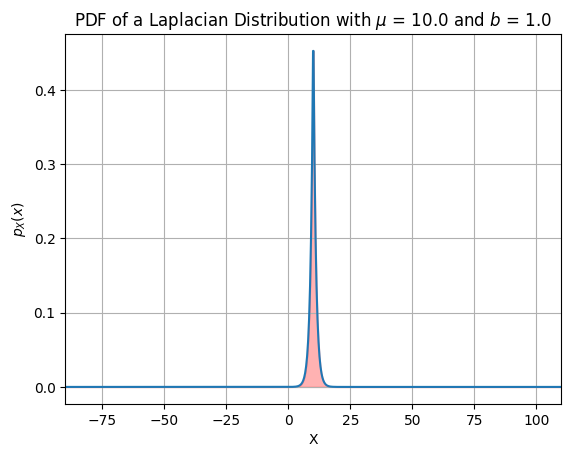

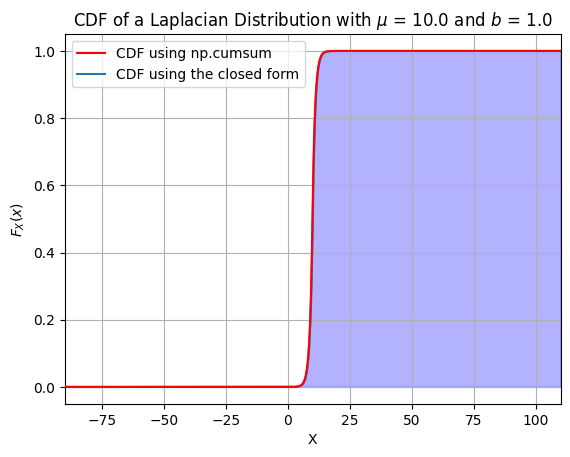

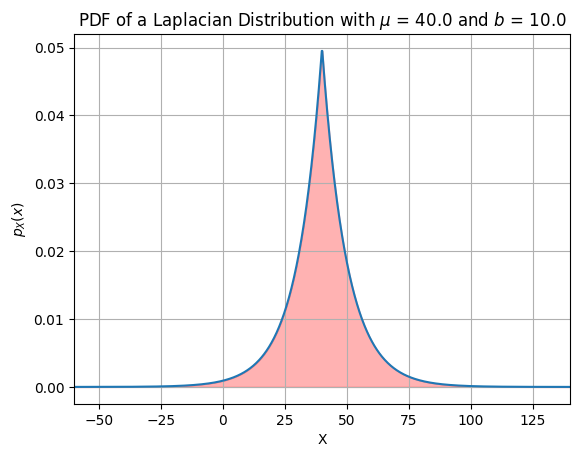

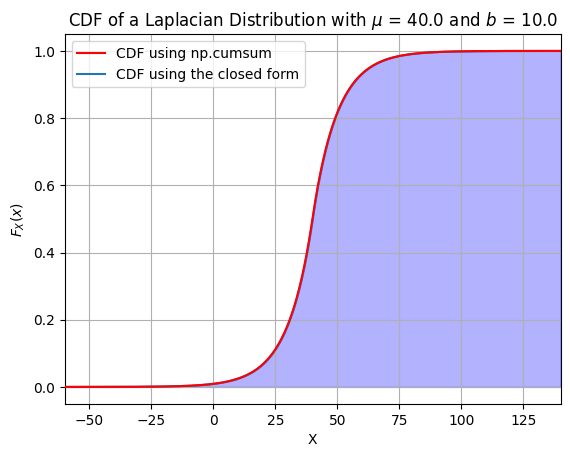

In [ ]:
inputs = []

def Plot_Laplacian_PDF_CDF(mu, b):
  hi = mu + 100
  lo = mu - 100
  N = 1000
  X = np.linspace(lo, hi, N)
  Y = Laplacian_pdf(X, mu, b)
  cdf = np.cumsum(Y / sum(Y))

  plot_graph(X, Y, f"PDF of a Laplacian Distribution with $\mu$ = {mu} and $b$ = {b}", "X", "$p_X(x)$", [lo, hi], c='r')
  plt.plot(X, cdf, label="CDF using np.cumsum", zorder=5, color='red')
  plot_graph(X, Laplacian_cdf(X, mu, b), f"CDF of a Laplacian Distribution with $\mu$ = {mu} and $b$ = {b}", "X", "$F_X(x)$", [lo, hi], label="CDF using the closed form", legend=True, c='blue')

for i in range(2):
  print(f"Enter values for Graph {i + 1}")
  inputs.append([float(input("Please enter the value for mu: ")), float(input("Please enter the value for b: "))])

for i in inputs:
  Plot_Laplacian_PDF_CDF(*i)

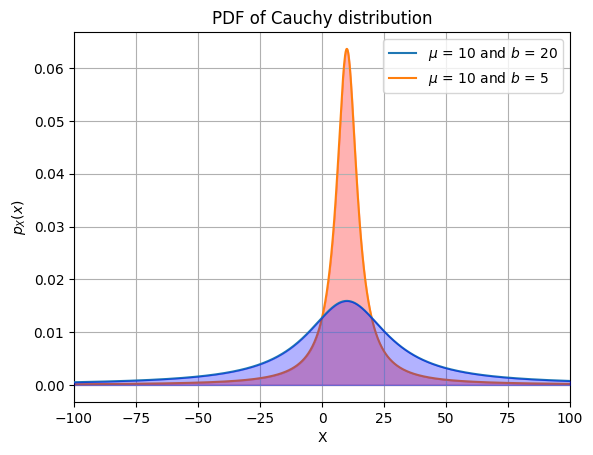

In [ ]:
hi = 100
lo = -100
N = 1000

X = np.linspace(lo, hi, int(N))
Y1 = Cauchy_pdf(X, 10, 5)
Y2 = Cauchy_pdf(X, 10, 20)

plt.plot(X, Y2, label="$\mu$ = 10 and $b$ = 20", zorder=5)
plt.fill_between(X, Y2, color='blue', alpha=0.3, zorder=5)
plot_graph(X, Y1, f"PDF of Cauchy distribution", "X", "$p_X(x)$", [lo, hi], c='r', label=f'$\mu$ = 10 and $b$ = 5', legend=True)

### Rayleigh Distribution PDF and CDF
The PDF $p_X(x)$ for a Rayleigh distribution is given by:

$$p_X(x) =   \left\{
\begin{array}{ll}
      0 &;\ x < 0\\
      \frac{x}{\sigma^2} e ^ {-\frac{x^2}{2\sigma ^2}} & ; \ x \ge 0 \\
\end{array}
\right.  $$


We can easily derrive the cumulative distributive function for $p_X(x)$. The CDF $F_X(x)$ is given by the intergral of the PDF from negative infinity to x. This comes out to be the following function:

$$F_X(x) = \int_{-\infty}^x p_X(x) \ dx$$

$$\therefore F_X(x) =   \left\{
\begin{array}{ll}
      0 &;\ x < 0\\
      \int_{0}^x \frac{x}{\sigma} e ^ {-\frac{x^2}{2\sigma ^2}} \ dx & ; \ x \ge 0 \\
\end{array}
\right.  $$


This integral evalutes to:

$$F_X(x) =   \left\{
\begin{array}{ll}
      0 &;\ x < 0\\
      1 - e ^ {-\frac{x^2}{2 \sigma^2}} & ; \ x \ge 0 \\
\end{array}
\right.  $$

In [ ]:
def Rayleigh_pdf(X, sigma):
  return np.where(X >= 0, X/(sigma * sigma) * np.exp(-X * X / (2 * sigma * sigma)), 0)

def Rayleigh_cdf(X, sigma):
  return np.where(X >= 0, 1 - np.exp(- X * X / (2 * sigma * sigma)), 0)

Enter values for Graph 1
Please enter sigma: 1
Enter values for Graph 2
Please enter sigma: 12.5


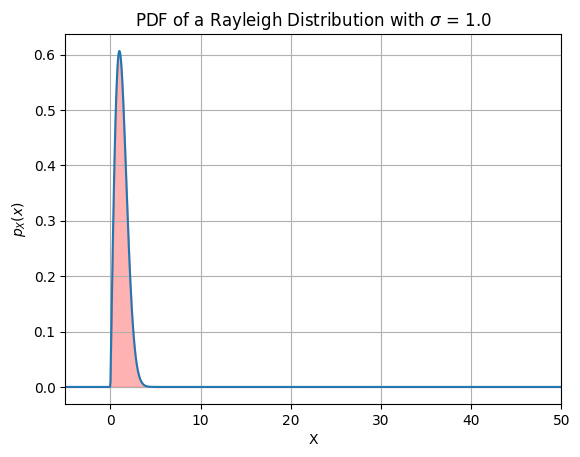

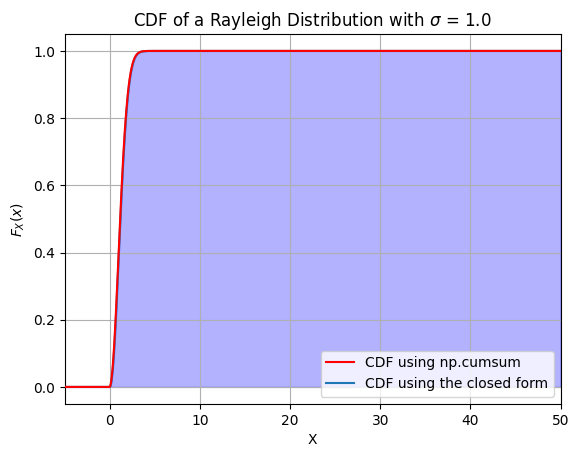

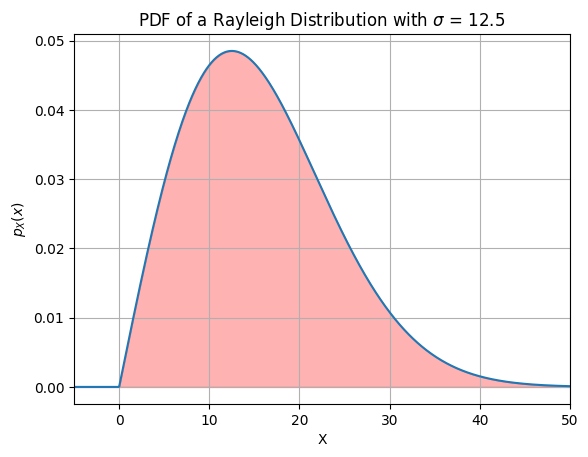

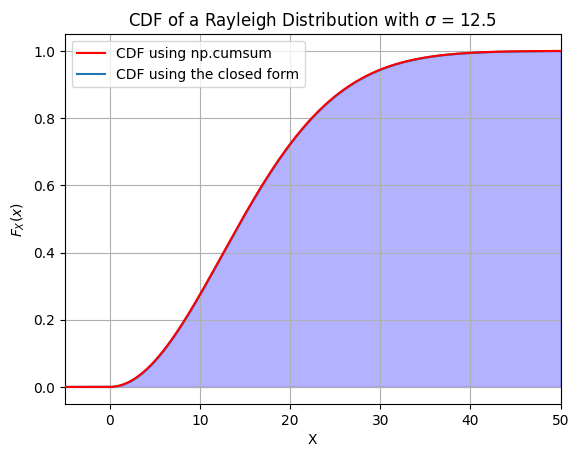

In [ ]:
inputs = []

def Plot_RayLeigh_PDF_CDF(sigma):
  hi = 50
  lo = -5
  N = 1000

  X = np.linspace(lo, hi, N)
  Y = Rayleigh_pdf(X, sigma)
  cdf = np.cumsum(Y / np.sum(Y))

  plot_graph(X, Y, f"PDF of a Rayleigh Distribution with $\sigma$ = {sigma}", "X", "$p_X(x)$", [lo, hi], c='r')
  plt.plot(X, cdf, label="CDF using np.cumsum", zorder=5, color='red')
  plot_graph(X, Rayleigh_cdf(X, sigma), f"CDF of a Rayleigh Distribution with $\sigma$ = {sigma}", "X", "$F_X(x)$", [lo, hi], label="CDF using the closed form", legend=True, c='b')

for i in range(2):
  print(f"Enter values for Graph {i + 1}")
  inputs.append([float(input("Please enter sigma: "))])

for i in inputs:
  Plot_RayLeigh_PDF_CDF(*i)

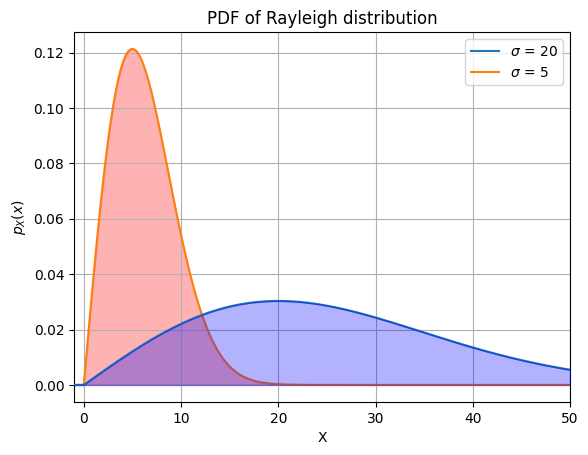

In [ ]:
hi = 50
lo = -1
N = 1000

X = np.linspace(lo, hi, int(N))
Y1 = Rayleigh_pdf(X, 5)
Y2 = Rayleigh_pdf(X, 20)

plt.plot(X, Y2, label="$\sigma$ = 20", zorder=5)
plt.fill_between(X, Y2, color='blue', alpha=0.3, zorder=5)
plot_graph(X, Y1, f"PDF of Rayleigh distribution", "X", "$p_X(x)$", [lo, hi], c='r', label=f'$\sigma$ = 5', legend=True)

## CDFs of Discrete Variables

Here I have plotted the Cumulative distribution functions (CDFs) of the following discrete random variables (which were given in lab assignment 3):
1. Discrete Uniform Random Variables
2. Bernoulli Random Variables
3. Binomial Random Variables
4. Poisson Random Variables
5. Geometric Random Variables

In [ ]:
def plot_discrete_cdf(X, Y, title):
  plt.step(X, Y, where='post')
  plt.fill_between(X, Y, step='post', alpha=0.3)
  plt.grid()
  plt.title(title)
  plt.xlabel('x')
  plt.ylabel("P(X < x) = $F_X(x)$")
  plt.show()

### Discrete Uniform CDF

The Cumulative Distribution Function $F_X(x)$ for a Discrete Uniform Random variable comes out to be:

$$F_X(x) = \lfloor x \rfloor$$

In [ ]:
def DiscreteUniform_cdf(X, n):
  return np.where((X >= 0) & (X < n), X/n, np.where(X >= n, 1, 0))

Enter the value of n: 10
Enter the value of n: 3


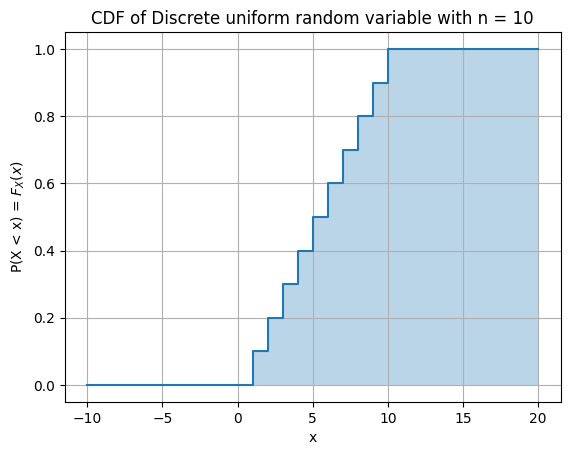

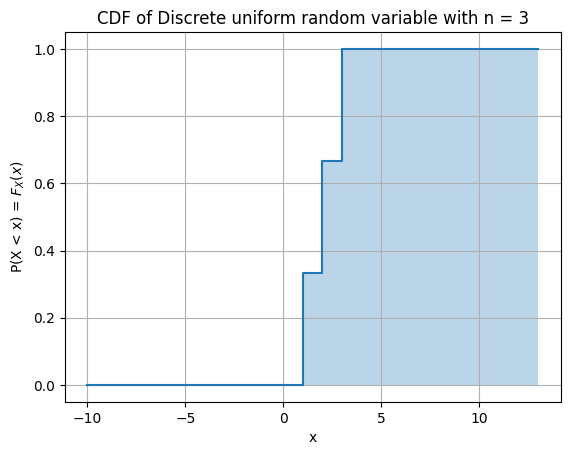

In [ ]:
inputs = []

def Plot_Discrete_Uniform_CDF(n):
  lo = -10
  hi = n + 10
  X = np.arange(lo, hi + 1)
  Y = DiscreteUniform_cdf(X, n)
  plot_discrete_cdf(X, Y, f"CDF of Discrete uniform random variable with n = {n}")

for i in range(2):
  inputs.append(int(input("Enter the value of n: ")))

for i in inputs:
  Plot_Discrete_Uniform_CDF(i)

### Bernoulli Distribution CDF
The Cumulative distribution function for Bernoulli Distribution comes out to be the following:

$$F_X(x) = \left\{
\begin{array}{ll}
      0 & ; \ x < 0 \\
      p & ; \ x \in [0, 1) \\
      1 & ; \ x \ge 1 \\
\end{array}
\right.$$

In [ ]:
def Bernoulli_cdf(X, p):
  return np.where(X < 0, 0, np.where(X < 1, p, 1))

Enter the value of p: 0.2
Enter the value of p: 0.5


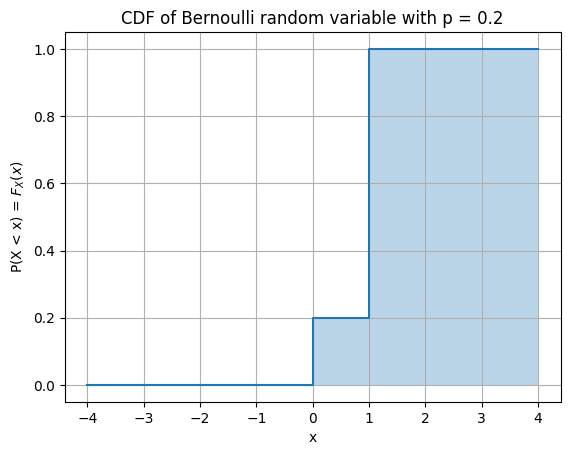

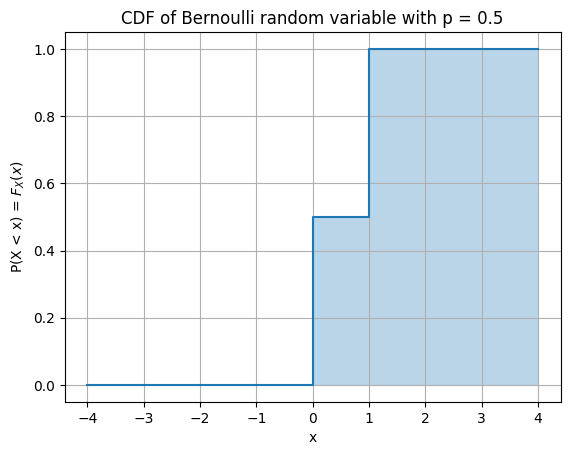

In [ ]:
inputs = []

def Plot_Bernoulli_CDF(p):
  lo = -4
  hi = 4
  X = np.arange(lo, hi + 1)
  Y = Bernoulli_cdf(X, p)
  plot_discrete_cdf(X, Y, f"CDF of Bernoulli random variable with p = {p}")

for i in range(2):
  inputs.append(float(input("Enter the value of p: ")))

for i in inputs:
  Plot_Bernoulli_CDF(i)

### Binomial Distribution CDF

The CDF for a Binomial random variable looks like:

$$F_X(x) = \sum_{k = 0}^{⌊x⌋} {M \choose k} \ p^k \cdot (1 - p) ^ {M - k}$$

This doesn't have a close form expression.

In [ ]:
def Binomial_pdf(M, p):
  return [factorial(M)/(factorial(k) * factorial(M - k)) * (p ** k) * ((1 - p) ** (M - k)) for k in range(M + 1)]

def Binomial_cdf(M, p):
  return np.cumsum(Binomial_pdf(M, p))

Enter the value of M: 10
Enter the value of p: 0.2
Enter the value of M: 10
Enter the value of p: 0.5


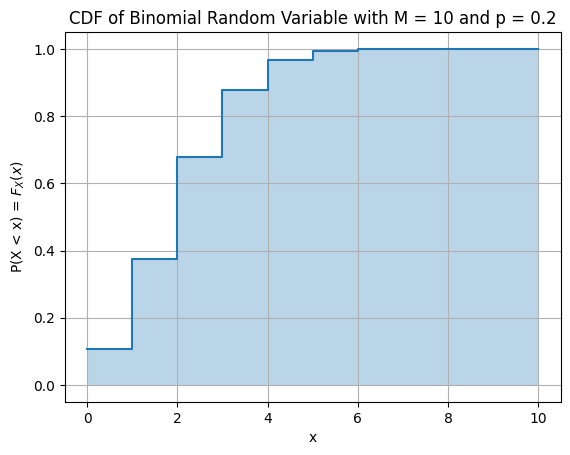

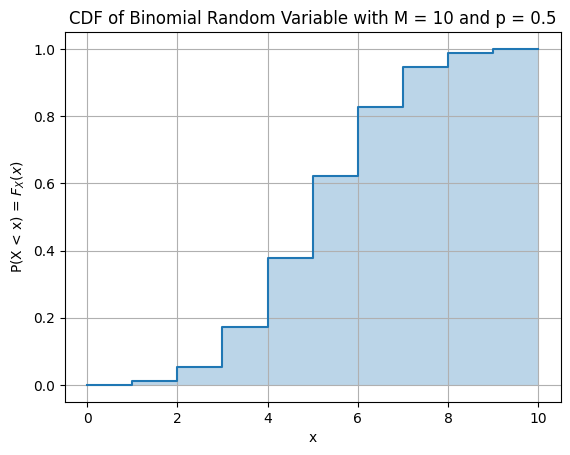

In [ ]:
inputs = []

def Plot_Binomail_CDF(M, p):
  X = np.arange(M + 1)
  Y = Binomial_cdf(M, p)
  plot_discrete_cdf(X, Y, f"CDF of Binomial Random Variable with M = {M} and p = {p}")

for i in range(2):
  inputs.append([int(input("Enter the value of M: ")), float(input("Enter the value of p: "))])

for i in inputs:
  Plot_Binomail_CDF(*i)

### Poisson Distribution CDF

The CDF for the Poisson random variable is:

$$F_X(x) = \sum_{k = 0}^{⌊x⌋} \frac{e ^ {-\lambda} \ \lambda^{k}}{k!}$$

A closed form expression doesn't exist for this CDF.

In [ ]:
# This will return the a poisson distribution for all values of k in [0, k_max].
def Poisson_pdf(l, k_max):
  return [math.exp(-l) * (l ** k) / factorial(k) for k in range(k_max + 1)]

def Poisson_cdf(l, k_max):
  return np.cumsum(Poisson_pdf(l, k_max))

Enter the number of value till where you want to see: 50
Enter the value of lambda: 4
Enter the value of lambda: 20


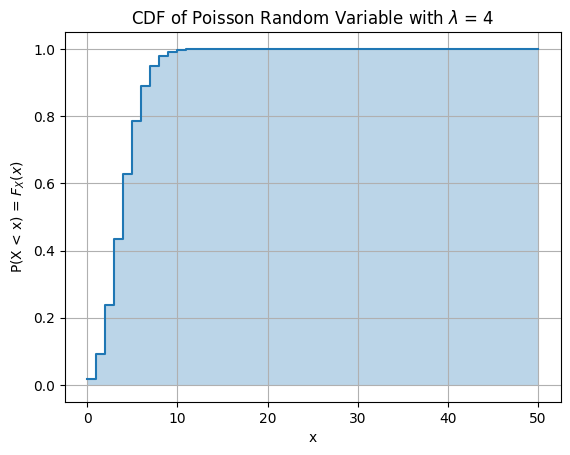

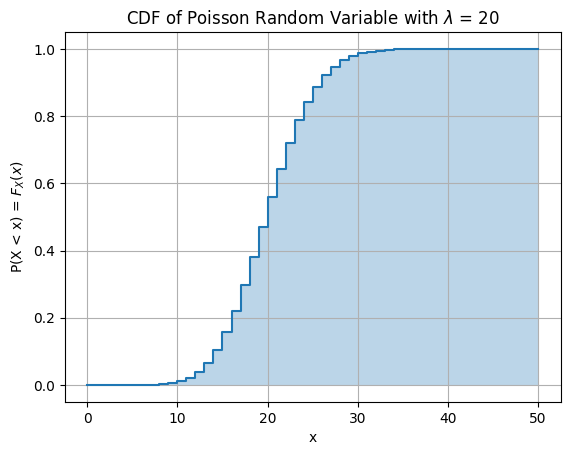

In [ ]:
inputs = []
k_max = int(input("Enter the number of value till where you want to see: "))

def Plot_Poisson_CDF(l):
  X = np.arange(k_max + 1)
  Y = Poisson_cdf(l, k_max)
  plot_discrete_cdf(X, Y, f"CDF of Poisson Random Variable with $\lambda$ = {l}")

for i in range(2):
  l = int(input("Enter the value of lambda: "))
  inputs.append(l)

for i in inputs:
  Plot_Poisson_CDF(i)

### Geometric Distribution CDF

The CDF for the geometric distribution comes out to be:


$$F_X(x) = \sum_{k = 1}^{⌊x⌋} (1 - p)^{k - 1} p$$
This simplifies to:

$$F_X(x) = p \ \frac{1 - (1 - p)^{⌊x⌋}}{p}$$


In [ ]:
def Geometric_pdf(p, k_max):
  return [((1 - p) ** (k - 1)) * p for k in range(1, k_max + 1)]

def Geometric_cdf_closed_form(p, k_max):
  return [p * (1 - (1 - p) ** (k)) / p for k in range(1, k_max + 1)]

def Geometric_cdf(p, k_max):
  return np.cumsum(Geometric_pdf(p, k_max))

Enter the number of value till where you want to see (upper bound of x-axis): 50
Enter the value of p: 0.2
Enter the value of p: 0.5


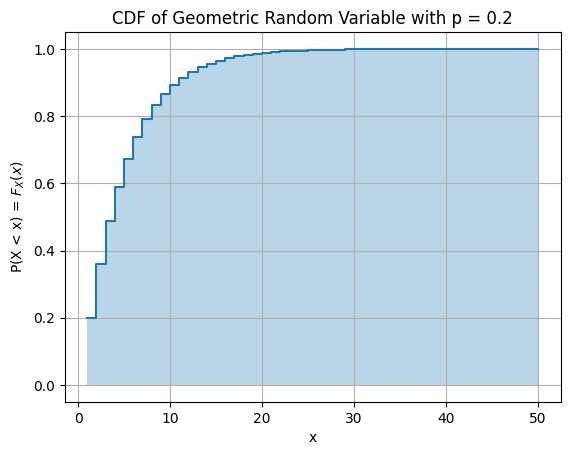

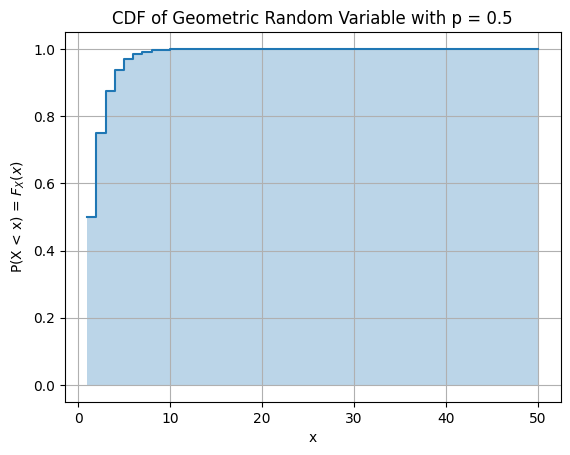

In [ ]:
inputs = []

k_max = int(input("Enter the number of value till where you want to see (upper bound of x-axis): "))

def Plot_Geometric_CDF(p):
  X = np.arange(k_max) + 1
  Y = Geometric_cdf(p, k_max)

  plot_discrete_cdf(X, Y, f"CDF of Geometric Random Variable with p = {p}")

for i in range(2):
  p = float(input("Enter the value of p: "))
  inputs.append(p)

for i in inputs:
  Plot_Geometric_CDF(i)